In [33]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [34]:
print("train.num = ", mnist.train.num_examples)
print("test.num = ", mnist.test.num_examples)
print("validation.num = ", mnist.validation.num_examples)

train.num =  55000
test.num =  10000
validation.num =  5000


#### shape 및 type(mnist) 확인

In [35]:
print("type(mnist) = ", type(mnist))
print("type(mnist.train.images) = ", type(mnist.train.images))
print("type(minst.train.labels) = ", type(mnist.train.labels))

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

print("\ntrain image shape = ", mnist.train.images.shape)
print("test image shape = ", mnist.test.images.shape)
print("validation image shape = ", mnist.validation.images.shape)

type(mnist) =  <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
type(mnist.train.images) =  <class 'numpy.ndarray'>
type(minst.train.labels) =  <class 'numpy.ndarray'>

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)

train image shape =  (55000, 784)
test image shape =  (10000, 784)
validation image shape =  (5000, 784)


#### train data 정규화 및 label의 one-hot encoding 확인

In [36]:
# 정규화 확인
print("length of mnist.train.images = ", len(mnist.train.images))

for index in range(len(mnist.train.images)):
    min_val = np.min(mnist.train.images[index])
    max_val = np.max(mnist.train.images[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break

print("")
print(mnist.train.images[0]) #정규화 확인을 위한 테스트 출력

length of mnist.train.images =  55000

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

In [37]:
# one-hot encoding 확인

print("length of mnist.train.images = ", len(mnist.train.labels))

for index in range (len(mnist.train.labels)):
    min_val = np.min(mnist.train.labels[index])
    max_val = np.max(mnist.train.labels[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break

print("")
print(mnist.train.labels[0])

length of mnist.train.images =  55000

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Hyper-parameter 설정

In [38]:
# 입력노드, 은닉노드, 출력노드, 학습율, 반복횟수, 배치 개수 등 설정
learning_rate = 0.1 #학습률
epochs = 100        #반복횟수
batch_size = 100    #한번에 입력으로 주어지는 MNIST 개수

input_nodes = 784   #입력노드 개수
hidden_nodes = 100  #은닉노드 개수
output_nodes = 10   #출력노드 개수

#### 입력과 출력을 위한 플레이스홀더 정의

In [39]:
#입력과 출력을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, input_nodes])
T = tf.placeholder(tf.float32, [None, output_nodes])

#### 가중치, 바이어스 정의

In [40]:
W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_nodes]))

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes]))
b3 = tf.Variable(tf.random_normal([output_nodes]))

In [41]:
Z2 = tf.matmul(X, W2) + b2
A2 = tf.nn.relu(Z2)

Z3 = logits = tf.matmul(A2, W3) + b3
y = A3 = tf.nn.softmax(Z3)

In [42]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z3, labels = T))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [43]:
# batch_size x 10 데이터에 대해 argmax를 통해 행단위로 비교함 
predicted_val = tf.equal(tf.argmax(A3, 1), tf.argmax(T, 1))

# batch_size x 10의 True, False를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype = tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype = tf.float32)

# 예측값 처리 2번째 인자가 1이면 긱행 기준으로 생각함 반대로 0이면 각열 기준으로 생각
predicted_list = tf.argmax(A3, 1)

In [44]:
# Type Check
print('type(predicted_val) = ', type(predicted_val), ', type(accuracy) = ', type(accuracy))
print('type(accuracy_index) = ', type(accuracy_index), ', type(predicted_list) = ', type(predicted_list))

type(predicted_val) =  <class 'tensorflow.python.framework.ops.Tensor'> , type(accuracy) =  <class 'tensorflow.python.framework.ops.Tensor'>
type(accuracy_index) =  <class 'tensorflow.python.framework.ops.Tensor'> , type(predicted_list) =  <class 'tensorflow.python.framework.ops.Tensor'>


In [50]:
index_label_false_list_1 = []
index_label_false_list_2 = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    start_time = datetime.now()
    
    for i in range(epochs): # 100번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size) # 55,000 / 100
        
        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict = {X : batch_x_data, T : batch_t_data})
            
            if step % 100 == 0:
                print("epochs = ", i ,", step = ", step, ", loss_val = ", loss_val)
            
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time : ", end_time - start_time)
    print("")
    
    # Accuracy 확인
    test_x_data = mnist.test.images # 10000 x 784
    test_t_data = mnist.test.labels # 10000 x 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, 
                    predicted_list, accuracy_index], feed_dict = {X : test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), 
          ", type(predicted_list_val) = ", type(predicted_list_val)
         , ', type(index_label) = ', index_label)
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    #list type 으로 디버그
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            index_label_false_list_1.append([index, np.argmax(test_t_data[index]), predicted_list_val[index]])
            
            
    print("\nlength of index_label_false_list_2", len(index_label_false_list_1))

    # numpy type 으로 디버그
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            index_label_false_list_2.append([index, np.argmax(test_t_data[index]), predicted_list_val[index]])
            
    print("\nlength of index_label_false_list_2", len(index_label_false_list_2))

epochs =  0 , step =  0 , loss_val =  148.92368
epochs =  0 , step =  100 , loss_val =  3.5064178
epochs =  0 , step =  200 , loss_val =  2.0015757
epochs =  0 , step =  300 , loss_val =  2.0953112
epochs =  0 , step =  400 , loss_val =  1.9735348
epochs =  0 , step =  500 , loss_val =  1.2826327
epochs =  1 , step =  0 , loss_val =  1.5203656
epochs =  1 , step =  100 , loss_val =  0.76752394
epochs =  1 , step =  200 , loss_val =  1.1341565
epochs =  1 , step =  300 , loss_val =  0.5123117
epochs =  1 , step =  400 , loss_val =  1.6768105
epochs =  1 , step =  500 , loss_val =  0.8775003
epochs =  2 , step =  0 , loss_val =  0.86026376
epochs =  2 , step =  100 , loss_val =  0.66688645
epochs =  2 , step =  200 , loss_val =  0.57560956
epochs =  2 , step =  300 , loss_val =  0.80362815
epochs =  2 , step =  400 , loss_val =  1.0634013
epochs =  2 , step =  500 , loss_val =  0.69381315
epochs =  3 , step =  0 , loss_val =  0.48783362
epochs =  3 , step =  100 , loss_val =  0.5592836
e

epochs =  27 , step =  0 , loss_val =  0.33764198
epochs =  27 , step =  100 , loss_val =  0.13445811
epochs =  27 , step =  200 , loss_val =  0.14936538
epochs =  27 , step =  300 , loss_val =  0.14142327
epochs =  27 , step =  400 , loss_val =  0.15093659
epochs =  27 , step =  500 , loss_val =  0.13623142
epochs =  28 , step =  0 , loss_val =  0.13159099
epochs =  28 , step =  100 , loss_val =  0.18605797
epochs =  28 , step =  200 , loss_val =  0.21578528
epochs =  28 , step =  300 , loss_val =  0.17678145
epochs =  28 , step =  400 , loss_val =  0.09629306
epochs =  28 , step =  500 , loss_val =  0.21652234
epochs =  29 , step =  0 , loss_val =  0.26583955
epochs =  29 , step =  100 , loss_val =  0.21280062
epochs =  29 , step =  200 , loss_val =  0.11761295
epochs =  29 , step =  300 , loss_val =  0.24856365
epochs =  29 , step =  400 , loss_val =  0.23730916
epochs =  29 , step =  500 , loss_val =  0.28632012
epochs =  30 , step =  0 , loss_val =  0.15602332
epochs =  30 , step 

epochs =  53 , step =  300 , loss_val =  0.107924774
epochs =  53 , step =  400 , loss_val =  0.06888231
epochs =  53 , step =  500 , loss_val =  0.092082046
epochs =  54 , step =  0 , loss_val =  0.12451239
epochs =  54 , step =  100 , loss_val =  0.13977276
epochs =  54 , step =  200 , loss_val =  0.08595316
epochs =  54 , step =  300 , loss_val =  0.059320845
epochs =  54 , step =  400 , loss_val =  0.10619841
epochs =  54 , step =  500 , loss_val =  0.14009032
epochs =  55 , step =  0 , loss_val =  0.12671046
epochs =  55 , step =  100 , loss_val =  0.08521189
epochs =  55 , step =  200 , loss_val =  0.106811106
epochs =  55 , step =  300 , loss_val =  0.08055915
epochs =  55 , step =  400 , loss_val =  0.082001284
epochs =  55 , step =  500 , loss_val =  0.33866334
epochs =  56 , step =  0 , loss_val =  0.09275665
epochs =  56 , step =  100 , loss_val =  0.25343814
epochs =  56 , step =  200 , loss_val =  0.084559985
epochs =  56 , step =  300 , loss_val =  0.036792684
epochs =  5

epochs =  80 , step =  0 , loss_val =  0.020421034
epochs =  80 , step =  100 , loss_val =  0.12468552
epochs =  80 , step =  200 , loss_val =  0.050950002
epochs =  80 , step =  300 , loss_val =  0.12551923
epochs =  80 , step =  400 , loss_val =  0.0711909
epochs =  80 , step =  500 , loss_val =  0.23583202
epochs =  81 , step =  0 , loss_val =  0.10618237
epochs =  81 , step =  100 , loss_val =  0.043490183
epochs =  81 , step =  200 , loss_val =  0.09239317
epochs =  81 , step =  300 , loss_val =  0.1124493
epochs =  81 , step =  400 , loss_val =  0.15708047
epochs =  81 , step =  500 , loss_val =  0.031167962
epochs =  82 , step =  0 , loss_val =  0.090639
epochs =  82 , step =  100 , loss_val =  0.0900324
epochs =  82 , step =  200 , loss_val =  0.08878086
epochs =  82 , step =  300 , loss_val =  0.16917332
epochs =  82 , step =  400 , loss_val =  0.0745435
epochs =  82 , step =  500 , loss_val =  0.024458423
epochs =  83 , step =  0 , loss_val =  0.06057944
epochs =  83 , step =

In [51]:
print(index_label_false_list_1)

[[8, 5, 8], [20, 9, 7], [92, 9, 4], [149, 2, 9], [151, 9, 8], [195, 3, 5], [241, 9, 5], [247, 4, 2], [259, 6, 0], [320, 9, 7], [321, 2, 7], [326, 2, 6], [340, 5, 3], [341, 6, 2], [381, 3, 7], [439, 6, 5], [445, 6, 0], [449, 3, 5], [511, 4, 8], [528, 3, 7], [542, 8, 5], [551, 7, 3], [565, 4, 9], [582, 8, 1], [591, 8, 3], [610, 4, 2], [613, 2, 8], [629, 2, 4], [646, 2, 6], [655, 8, 2], [659, 2, 3], [684, 7, 3], [691, 8, 4], [707, 4, 9], [717, 0, 6], [720, 5, 8], [740, 4, 9], [774, 4, 9], [810, 7, 2], [832, 7, 9], [839, 8, 3], [844, 8, 7], [866, 5, 8], [877, 8, 5], [882, 9, 4], [900, 1, 3], [938, 3, 5], [951, 5, 4], [956, 1, 2], [1003, 5, 3], [1014, 6, 5], [1017, 6, 2], [1032, 5, 8], [1050, 2, 4], [1092, 3, 5], [1107, 9, 8], [1114, 3, 2], [1124, 8, 1], [1125, 8, 9], [1128, 3, 7], [1147, 4, 7], [1156, 7, 3], [1181, 6, 1], [1182, 6, 8], [1184, 2, 1], [1194, 7, 9], [1200, 8, 3], [1206, 7, 2], [1226, 7, 2], [1228, 9, 3], [1232, 9, 6], [1234, 8, 5], [1242, 4, 9], [1247, 9, 0], [1248, 8, 2], [1

In [52]:
print(index_label_false_list_2)

[[8, 5, 8], [20, 9, 7], [92, 9, 4], [149, 2, 9], [151, 9, 8], [195, 3, 5], [241, 9, 5], [247, 4, 2], [259, 6, 0], [320, 9, 7], [321, 2, 7], [326, 2, 6], [340, 5, 3], [341, 6, 2], [381, 3, 7], [439, 6, 5], [445, 6, 0], [449, 3, 5], [511, 4, 8], [528, 3, 7], [542, 8, 5], [551, 7, 3], [565, 4, 9], [582, 8, 1], [591, 8, 3], [610, 4, 2], [613, 2, 8], [629, 2, 4], [646, 2, 6], [655, 8, 2], [659, 2, 3], [684, 7, 3], [691, 8, 4], [707, 4, 9], [717, 0, 6], [720, 5, 8], [740, 4, 9], [774, 4, 9], [810, 7, 2], [832, 7, 9], [839, 8, 3], [844, 8, 7], [866, 5, 8], [877, 8, 5], [882, 9, 4], [900, 1, 3], [938, 3, 5], [951, 5, 4], [956, 1, 2], [1003, 5, 3], [1014, 6, 5], [1017, 6, 2], [1032, 5, 8], [1050, 2, 4], [1092, 3, 5], [1107, 9, 8], [1114, 3, 2], [1124, 8, 1], [1125, 8, 9], [1128, 3, 7], [1147, 4, 7], [1156, 7, 3], [1181, 6, 1], [1182, 6, 8], [1184, 2, 1], [1194, 7, 9], [1200, 8, 3], [1206, 7, 2], [1226, 7, 2], [1228, 9, 3], [1232, 9, 6], [1234, 8, 5], [1242, 4, 9], [1247, 9, 0], [1248, 8, 2], [1

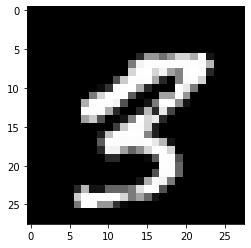

label =  3


In [53]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[9944].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[9944]))

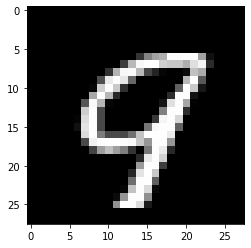

label =  9


In [54]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[9918].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[9918]))

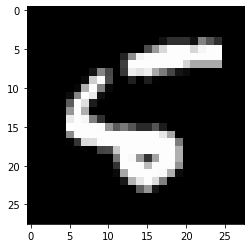

label =  5


In [55]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[8].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[8]))